
    
## Анализ клиентской базы фитнес-центра в целях снижения оттока.

## План исследования

Шаг 1. Загрузка данных
    
    1.1. Приведение названий столбцов к нижнему регистру

Шаг 2. Проведение исследовательского анализа данных (EDA)
    
    2.1. Проверка данных на пропуски и дубликаты. Изучение средних значений и стандартных отклонений.
    2.2. Анализ средних значений признаков в двух группах — тех, кто ушел в отток и тех, кто остался.
    2.3. Построение графиков для двух групп

Шаг 3. Построение модели прогнозирования оттока клиентов

Шаг 4. Кластеризация клиентов

    4.1. Построение модели на основании алгоритма K-means c числом кластеров n=
    4.2. Анализ средних значений признаков для кластеров
    4.3. Распределение признаков для кластеров
    4.4. Доля оттока

Шаг 5. Выводы и рекоммендации

<a id='1'> </a> 
### Шаг 1. Загрузка данных

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from scipy.cluster.hierarchy import dendrogram, linkage 

from sklearn.cluster import KMeans


df = pd.read_csv('/datasets/gym_churn.csv')

display(df.shape)
display(df.head(10))
display(df.info())

(4000, 14)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


None

#### 1.1.Приведение названий столбцов к нижнему регистру

In [2]:
df.columns = ['gender','near_location','partner','promo_friends','phone','contract_period', 'group_visits', 'age',
              'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total',
              'avg_class_frequency_current_month', 'churn']
display(df.head(1))

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.22747,5.0,3,0.020398,0.0,0


<div style="border:solid gray 2px; padding: 20px">
В данных представлены бинарные и количественные признаки. Наблюдений в датасете 4000, признаков - 13 и одна целевая перемена - churn - факт оттока.

### Шаг 2. Исследовательский анализ данных

##### 2.1. Проверка данных на пропуски и дубликаты.  Изучение средних значений и стандартных отклонений

In [3]:
print('\x1b[1;94m'+'Количество пропущенных значений:'+'\x1b[0m')
print(df.isna().sum())

print('')
print('\x1b[1;94m'+'Количество дубликатов:'+'\x1b[0m'+'{}'.format(df.duplicated().sum()))

df.describe()

Количество пропущенных значений:
gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

Количество дубликатов:0


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


<div style="border:solid gray 2px; padding: 20px">
    
В представленном датасете отсутствуют пропущенные значения и дубликаты. 
    
Средние значения:
    
Клиенты по полу распределены примерно одинаково (равное количество мужчин и женщин). Около 85% живут рядом с фитнес-центром.  Приблизительно 50 % - сотрудники компании-партнёра клуба. 30% пришли по программе "приведи друга". Только у 10% не указан контактный телефон. В среднем длительность текущего действующего абонемента почти 5 месяцев. Около 40% посещают групповые занятия. Средний возраст - 30 лет. Выручка от других услуг фитнес-центра - 147. Срок до окончания текущего действующего абонемента - 4 месяца. В среднем, время с момента первого обращения в фитнес-центр около 4 мес. Средняя частота посещений в неделю за все время с начала действия абонемента - 1,8 раз в неделю, за пред.месяц - 1,7. Процент оттока составил -26,5.
    
Т.к. стандартное отклонение в признаках "возраст" и "суммарная выручка от других услуг фитнес-центра" велико, то необходимо будет стандартизировать данные перед построением модели, на этапе обучения. 

##### 2.2. Средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался 

In [4]:
df.groupby('churn').agg('mean')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<div style="border:solid gray 2px; padding: 20px">
Из данной таблицы можно сделать следующие выводы:
    
Пол, наличие контактного телефона не влияет на факт оттока. Клиенты, которые живут дальше от фитнес центра чаще попадают в отток. Сотрудники компании-партнёра клуба; клиенты, которые пришли по акции "приведи друга" реже попадают в отток. Клиенты помоложе чаще попадают в отток (в  среднем 27 лет). У клиентов в оттоке меньше среднее количество посещений в неделю за всё время. Больше групповых занятий посетили клиенты, которые не попали в отток, у них же больше продолжительность действия договора. Данные по посещению меньше у клиентов, которые попали в отток, что логично.

##### 2.3. Построение графиков для тех, кто ушёл (отток) и тех, кто остался

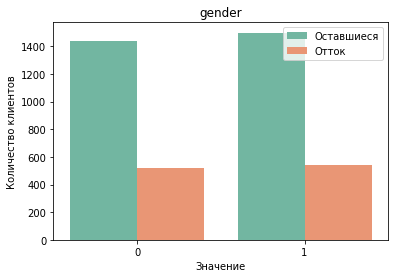

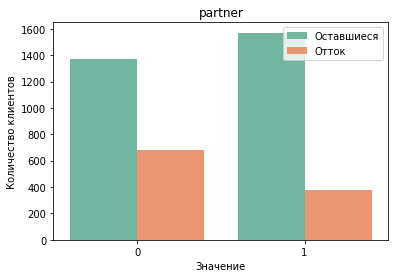

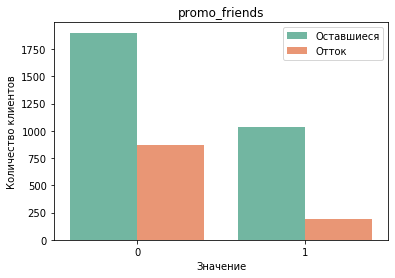

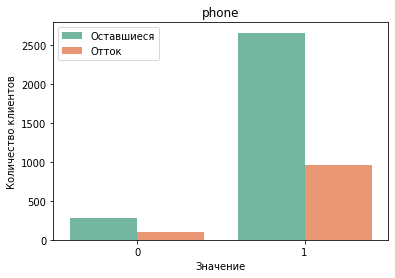

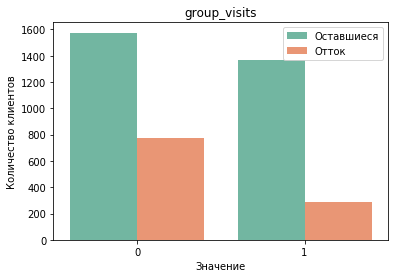

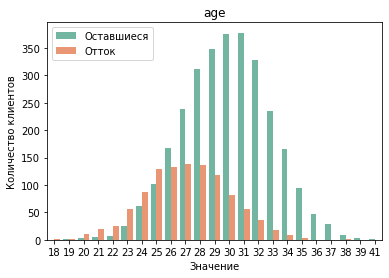

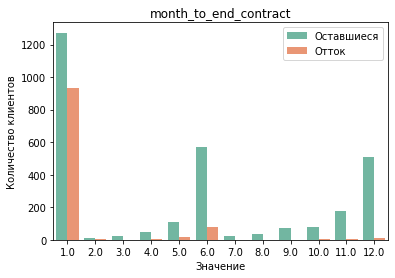

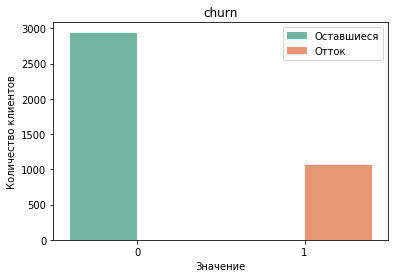

In [5]:
for column in df[['gender','partner','promo_friends','phone','group_visits','age','month_to_end_contract','churn']].columns: 
    ax =sns.countplot(x=column, hue='churn',data=df,palette="Set2") 
    plt.title(column)
    plt.ylabel("Количество клиентов")
    plt.xlabel("Значение")
    plt.legend(['Оставшиеся', 'Отток'])
    plt.show()

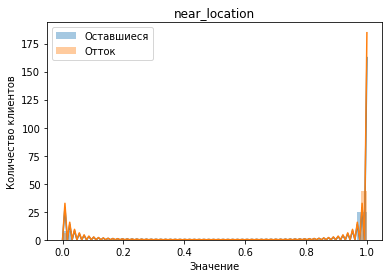

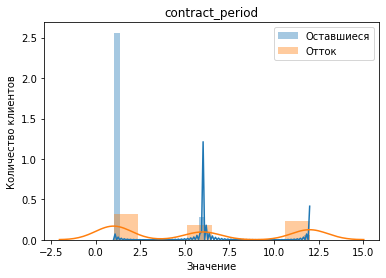

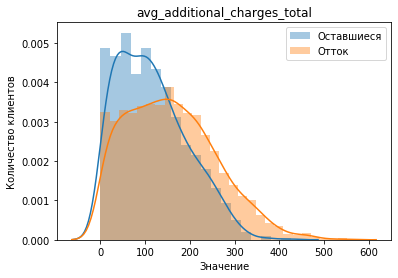

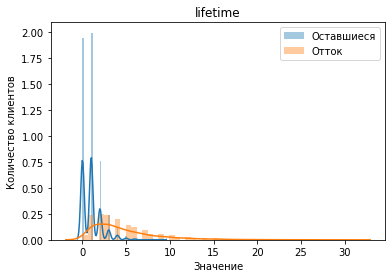

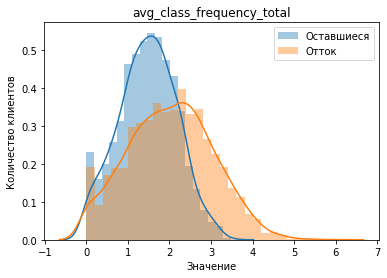

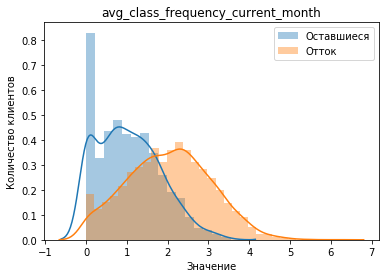

In [6]:
churn_1 = df[df['churn']==1]
churn_0 = df[df['churn']==0]

for column in df[['near_location','contract_period', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total',
                  'avg_class_frequency_current_month']].columns: 
    sns.distplot(churn_1[column])
    sns.distplot(churn_0[column]) 
    plt.title(column)
    plt.ylabel("Количество клиентов")
    plt.xlabel("Значение")
    plt.legend(['Оставшиеся', 'Отток'])
    plt.show()

##### 2.3. Построение матрицы корреляций и её отображение

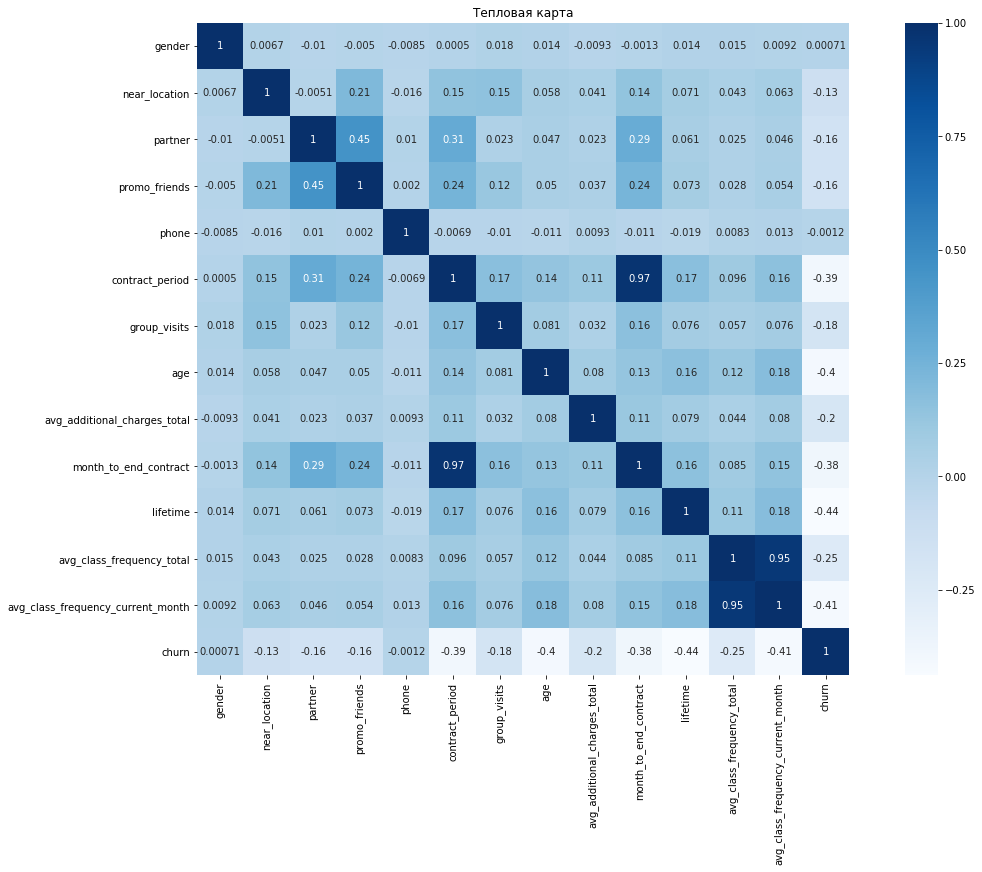

In [7]:
cm = df.corr()

plt.figure(figsize=(20, 12))
plt.title('Тепловая карта')
sns.heatmap(cm, annot = True, square=True, cmap = 'Blues') 
plt.show()

In [8]:
df.drop(['month_to_end_contract','avg_class_frequency_current_month'], axis = 1, inplace = True)

<div style="border:solid gray 2px; padding: 20px">

Признаки, которые не влияют на факт оттока - пол и возраст. 
    
Есть группа линейно зависимых (мультиколлинеарных) признаков: 

- длительность текущего действующего абонемента и срок до окончания текущего действующего абонемента
    
- средняя частота посещений в неделю за все время с начала действия абонемента и средняя частота посещений в неделю за предыдущий месяц
    
Чтобы избавиться от мультиколлинеарности, удалили признаки - 'Month_to_end_contract' и 'Avg_class_frequency_current_month'.

### Шаг 3. Построение модели прогнозирования оттока клиентов

In [9]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('churn', axis = 1) 
y = df['churn'] 

#разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) 

# стандартизируем данные 
scaler = StandardScaler()
scaler.fit(X_train) 
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

#### Обучение модели на train-выборке логистической регрессией, случайным лесом

In [10]:
lr_model = LogisticRegression(solver='lbfgs', random_state= 0)

lr_model.fit(X_train_st, y_train)

lr_predictions = lr_model.predict(X_test_st)

lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predictions)))

Accuracy: 0.91
Precision: 0.83
Recall: 0.83


In [11]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=0)

rf_model.fit(X_train_st, y_train)

rf_predictions = rf_model.predict(X_test_st)

rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Accuracy: 0.89
Precision: 0.81
Recall: 0.79


<div style="border:solid gray 2px; padding: 20px">
    
Такие метрики как доля правильных ответов, точность и полнота выше у модели Логистическая регрессия.  

### Шаг 4. Построение модели прогнозирования оттока клиентов

#### 4.1. Построение модели на основании алгоритма K-means c числом кластеров n=5

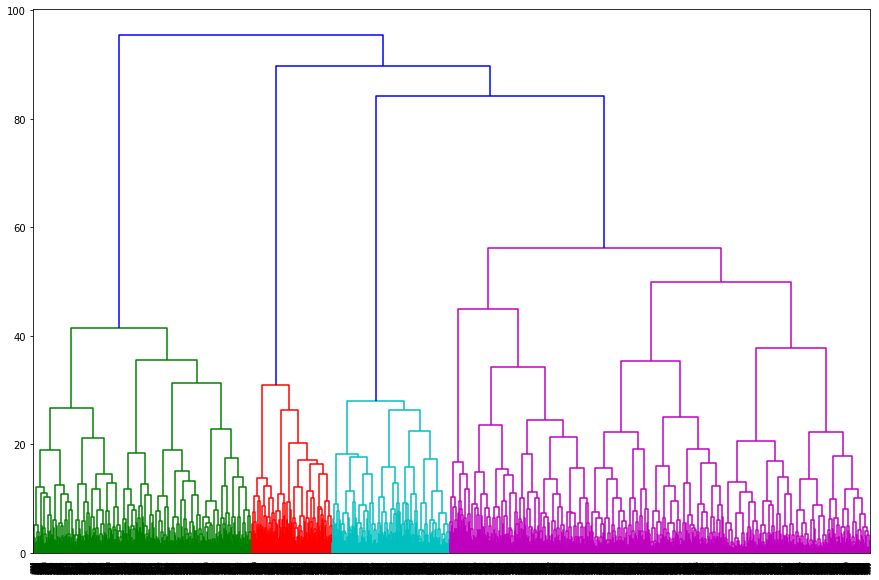

In [12]:
X_st = scaler.fit_transform(X)

linked = linkage(X_st, method='ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

In [13]:
km = KMeans(n_clusters = 5, random_state=0)

labels = km.fit_predict(X_st)

df['cluster'] = labels

<div style="border:solid gray 2px; padding: 20px">
    
Предложенное оптимальное число кластеров 4, примем число кластеров равное 5. 

#### 4.2 Анализ средних значений признаков для кластеров

In [14]:
display(df.groupby('cluster').mean())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
cluster,,,,,,,,,,,,
0,0.499109,0.000000,0.488414,0.076649,1.0,3.032086,0.235294,28.721925,137.540009,3.060606,1.770413,0.399287
1,0.488571,0.995238,0.955238,0.892381,1.0,7.660952,0.458095,29.543810,155.861428,4.380952,1.978963,0.120952
2,0.505300,1.000000,0.238516,0.059187,1.0,2.819788,0.000000,28.770318,143.383993,3.343640,1.800647,0.381625
3,0.544202,1.000000,0.250287,0.079219,1.0,4.528129,1.000000,29.536165,148.088897,3.761194,1.941342,0.200918
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.266839


<div style="border:solid gray 2px; padding: 20px">

Кластеры почти не различаются по следующим признакам: пол, возраст, суммарная выручка от других услуг.


Сильнее всего отток заметен в кластерах 3 и 4. У них же меньше всего контрактный период, признак посещения групповых занятиях. Т.о. изначально клиенты заключают контракты на маленький срок и следовательно меньше посещают занятия в группе. 

#### 4.3 Распределение признаков для кластеров

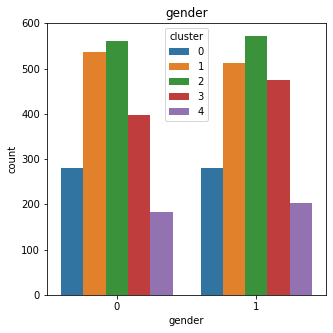

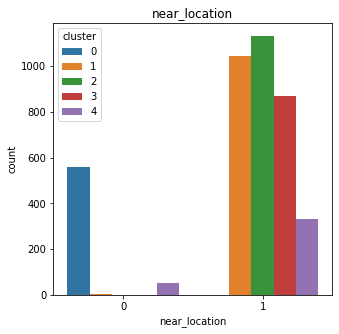

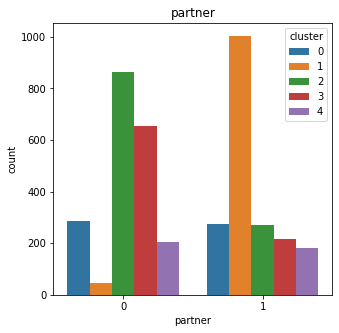

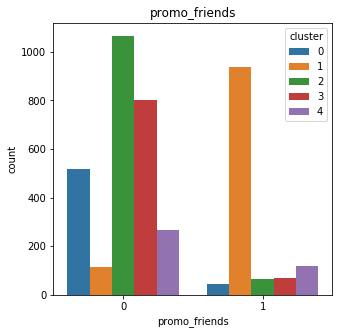

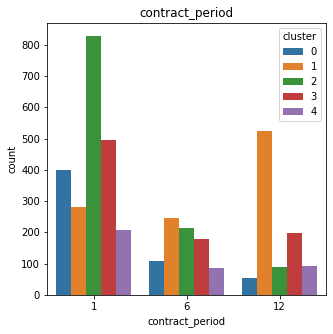

In [15]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='cluster', data=df)
    plt.title(column)
    plt.show()

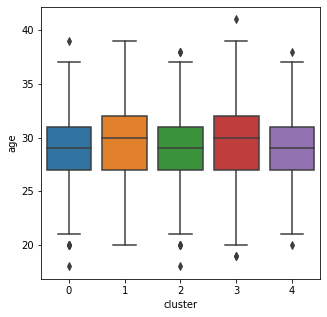

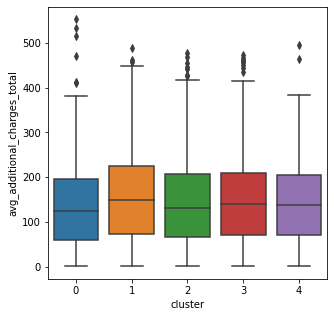

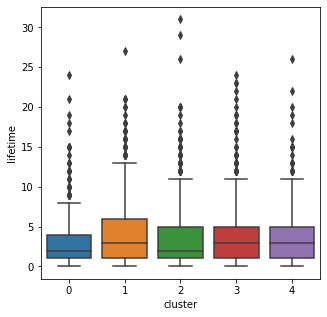

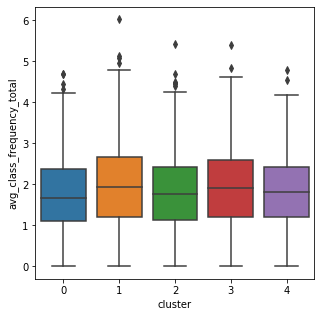

In [16]:
for column in ['age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total']:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x = 'cluster', y = df[column], data = df)
    plt.show()

 #### 4.4. Доля оттока

In [17]:
df.groupby(['cluster']).mean()['churn']

cluster
0    0.399287
1    0.120952
2    0.381625
3    0.200918
4    0.266839
Name: churn, dtype: float64

## Шаг 5. Выводы и рекоммендации




Описание данных:

Клиенты по полу распределены примерно одинаково (равное количество мужчин и женщин). Около 85% живут рядом с фитнес-центром.  Приблизительно 50 % - сотрудники компании-партнёра клуба. 30% пришли по программе "приведи друга". Только у 10% не указан контактный телефон. В среднем длительность текущего действующего абонемента почти 5 месяцев. Около 40% посещают групповые занятия. Средний возраст - 30 лет. Выручка от других услуг фитнес-центра - 147. Срок до окончания текущего действующего абонемента - 4 месяца. В среднем, время с момента первого обращения в фитнес-центр около 4 мес. Средняя частота посещений в неделю за все время с начала действия абонемента - 1,8 раз в неделю, за пред.месяц - 1,7. Процент оттока составляет -26,5.

Признаки, которые влияют на отток клиентов:

Клиенты, которые живут дальше от фитнес центра чаще попадают в отток. Сотрудники компании-партнёра клуба; клиенты, которые пришли по акции "приведи друга" реже попадают в отток. Клиенты помоложе чаще попадают в отток (в  среднем 27 лет). У клиентов в оттоке меньше среднее количество посещений в неделю за всё время. Больше групповых занятий посетили клиенты, которые не попали в отток, у них же больше продолжительность действия договора.

Была построена прогнозная модель "Логистическая регрессия" с точностью прогноза - 83%.


С помощью алгоритма данные были разделены на кластеры.
В результате кластеризации были получены кластеры со следующими характерными признаками:
    
    Кластер 1: Близкое расположение к центру, большинство клиентов - сотрудники компании-партнёра клуба либо пришли по акции «приведи друга». В основном, клиенты заключают договора на самый длинный период времени - год. Достаточно частое посещение зала относительно других кластеров.

    Кластер 2: Во втором кластере отсутствуют данные контактных телефонов. По остальным признакам представлены средние значения. 

    Кластер 3: Клиенты дальше всего живут от фитнес-центров. Меньше всего клиентов посещают групповые занятия.

    Кластер 4: В четвертом кластере все клиенты живут рядом с центром. В основном, клиенты пришли не по акции и не являются сотрудниками компании партнёра. Меньше всего тратили денег на покупку других услуг. Самая низкая посещаемость зала.

    Кластер 5: Самая старшая группа. В основном, клиенты пришли не по акции и не являются сотрудниками компании партнёра.Больше всех потратили на доп.услуги от фитнес-центра.
    
Рекоммендации:

    1) Расширить предложение групповых занятий, постараться привлечь аудиторию из кластеров 3 и 4.
    
    2) При продаже акцентировать внимание клиента на абонементы с длительным сроком. Как вариант, предлагать клиентам, которые купили месячный абонемент, абонемент на год со скидкой.
    
    3) Воспользоваться прогнозной моделью, определить клиентов, которые с большей вероятностью попадут в отток, и стимулировать их акционными предложениями.